
In this notebook, we train two decision tree classifiers and compare their performance.

For this, we are using the **E Coli bacteria Dataset** supplied on the UCI Machine Learning webpage.

As per the **E Coli bacteria Dataset's** details on the UCI Machine Learning webpage, the data contains **protein localization sites**. There are a total of **8 attributes**, of which **7 are predictive(mcg, gvh, lip, chg, aac, alm1,and alm2) and 1 is a name (SequenceName)**. It is also mentioned that are **no missing attribute values** in this dataset.

All the tasks to be performed are divided into the following sections.
<br>

* **TASK A: Data Visualization and cleaning**
         a1. Reading the data, hard coding the column headings, seeing the first few lines and displaying the features
         a2. Performing data cleaning operations to remove non-numeric data, and the classes having less than 10 instances
         a3. Plotting histograms for all the features
         a4. Splitting the dataset into training and test sets 
            
* **TASK B: DT Classifier (raw)**
         b1. Implementing GridSearchCV with 3-fold cross validation to find the best hyperparameters and implementing 
             Decision Tree Classifier(raw) and displaying the confusion matrix
         b2. Visualizing the decision tree using graphviz
            
* **TASK C: DT Classifier (scaled)**
         c1. Performing feature scaling using standard scaler
         c2. Implementing Decision Tree Classifier(scaled) and displaying the confusion matrix
         c3. Visualizing the decision tree using graphviz
* **TASK D: Outputs and comparison**

Let us peform the tasks.


### TASK A: &emsp; Data Visualization and cleaning
###### a1. &emsp; The below code is to read the data, hard code the column headings, display the features and see the first few lines of the dataset.

In [1]:
import os
import pandas as pd
import numpy as np

cwd = os.getcwd()   #get the current working directory
newpath = os.path.join(cwd,'ecoli.data')  #retrieving the path of the dataset file
df1 = pd.read_csv(newpath, header=None, delim_whitespace=True, names =['SequenceName','mcg','gvh','lip','chg','aac','alm1','alm2','Class'])    #reading the dataset to the dataframe df
df1.head()     #displaying the first 5 records of the ecoli Dataset 

,SequenceName,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [2]:
df1.info()   #printing the summary of the dataset
df1.isnull().values.any()   #checking for any null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SequenceName  336 non-null    object 
 1   mcg           336 non-null    float64
 2   gvh           336 non-null    float64
 3   lip           336 non-null    float64
 4   chg           336 non-null    float64
 5   aac           336 non-null    float64
 6   alm1          336 non-null    float64
 7   alm2          336 non-null    float64
 8   Class         336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


False

In [3]:
df1.info()     #displaying all attributes and their datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SequenceName  336 non-null    object 
 1   mcg           336 non-null    float64
 2   gvh           336 non-null    float64
 3   lip           336 non-null    float64
 4   chg           336 non-null    float64
 5   aac           336 non-null    float64
 6   alm1          336 non-null    float64
 7   alm2          336 non-null    float64
 8   Class         336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


In [4]:
df1.describe()  #displaying the summary of the numeric attributes 

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [5]:
value_counts = df1['Class'].value_counts()
print("The number of instances of each class are as below \n",value_counts)  #counting the unique values in the 'Class' attribute

to_remove = value_counts[value_counts < 10].index    #selecting classes with less than 10 instances
print("The classes to be removed are", to_remove)
df1 = df1[~df1.Class.isin(to_remove)]   #updating the dataset without the classes having less than 10 instances

updated_value_counts = df1['Class'].value_counts()

print("The number of instances of each class, after removing the classes with less than 10 instances are as below \n",updated_value_counts)  #counting the unique values in the 'Class' attribute

df1=df1.reset_index(drop=True)   #renumbering the index locations after dropping rows

df1= df1.drop(['SequenceName'],axis=1)  #dropping SequenceName column (non-numeric column)
df1

The number of instances of each class are as below 
 cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: Class, dtype: int64
The classes to be removed are Index(['omL', 'imS', 'imL'], dtype='object')
The number of instances of each class, after removing the classes with less than 10 instances are as below 
 cp     143
im      77
pp      52
imU     35
om      20
Name: Class, dtype: int64


,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


We can see that the classes **omL(5), imL(2), and imS(2)** have less than 10 instances. As it is not possible to classify, we removed them. After removing the above classes, we renumbered the index locations, just to make sure we don't have any undefined rows in the dataset. We can also see that the attribute **SequenceName** has non-numeric data which is unique. The best way to deal this data is to remove the **SequenceName** attribute to proceed further. 

###### a3. &emsp; Plotting histograms for all the features

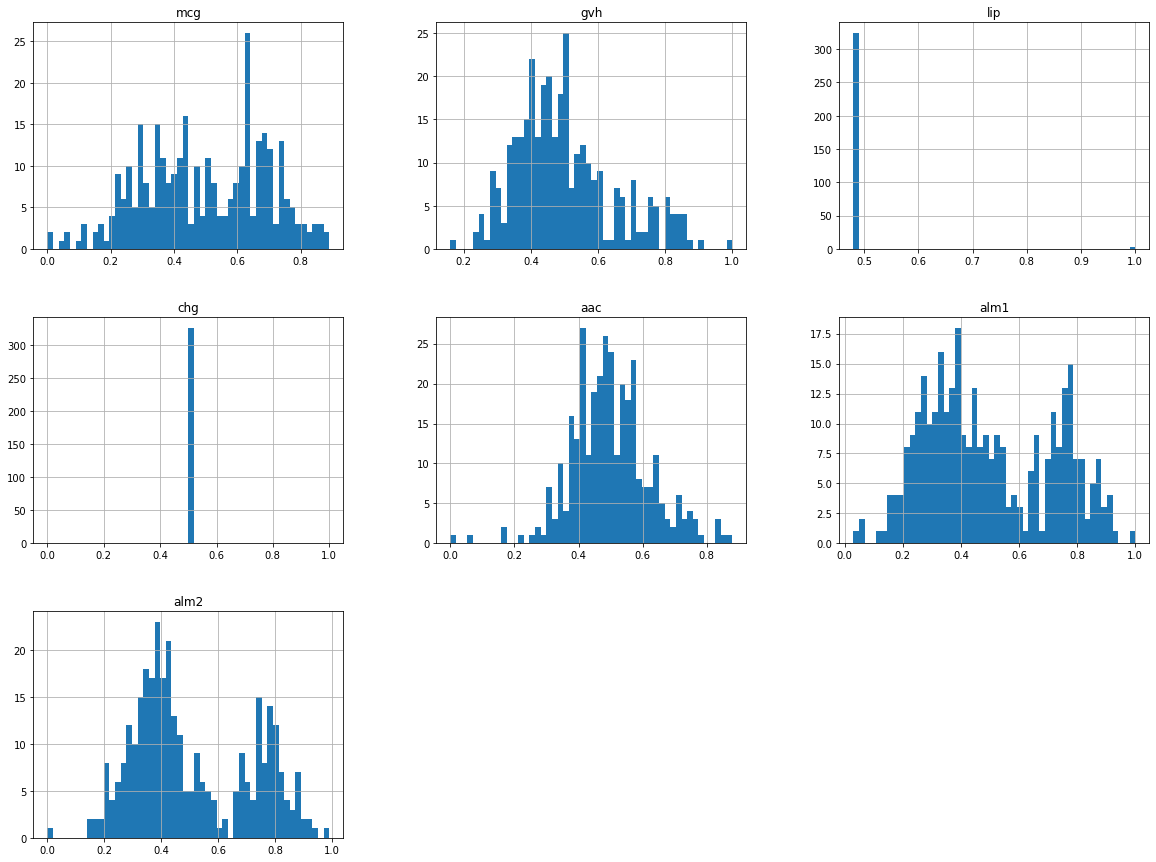

In [6]:
# plotting histograms for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
df1.hist(bins=50, figsize=(20,15))   #plotting histograms for all the numeric columns
plt.show()

From the above histogram, we can see that the features **mcg, alm1, alm2** have a **multi-modal distribution**, where as the features **lip, chg** have a **binary distribution** of instances. We can also see that the features **gvh, aac** have a **Gaussian-like distribution**.

 ###### a4. &emsp; Splitting the dataset into training and test sets 
As our dataset has a class imbalance problem, to split the dataset into training and test sets, we are using StratifiedKFold from Skikit-Learn's model_selection. In this, we are using StratifiedKFold's split operation to get the train and test indices for each split and then use them to split the dataset into training and test sets. 

In [8]:
#splitting the data to train and test sets using stratified splitting
#to make this notebook's output identical at every run
np.random.seed(10)

#dividing data into attributes and labels
x = df1.drop('Class', axis=1)
y = df1.Class

#splitting data to train and test sets
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.50, random_state=10,stratify=y)   #applying a stratified split3

### TASK B: &emsp; DT Classifier (raw)
###### b1. &emsp; Implementing GridSearchCV with 3-fold cross validation to find the best hyperparameters and implementing Decision Tree Classifier(raw) and displaying the confusion matrix
We are using Scikit-Learn's GridSearchCV to fine-tune the model with hyperparameters, which will use cross-validation to evaluate all the possible combinations of the given hyperparameter values. 

**Criterion, max_depth, and max_features** are the **hyperparameters** which we are using for tuning the Decision Tree classifier.   
* **'criterion'** is the function to measure the quality of a split.**"gini"**(for the Gini impurity) and **"entropy"**(for the information gain) are the supported criteria. Default is **'gini'**.
* **'max_depth'** is the maximum depth of the tree. Can be int or None. Default is **None**.
* **'max_features'** is the number of features to consider when looking for the best split. Can be int or float or {'auto','sqrt','log2'}. Default is **None**. If 'auto', then max_features = sqrt(n_features). If 'sqrt', then max_Features=sqrt(n_features). If 'log2', then max_features=log2(n_features).

Here, we are using the **GridSearchCV** with **3-fold cross validation** on the above three hyperparameters. Then we will implement the Decision Tree Classifier on the raw data.

In [9]:
#performing GridSearchCV to find the best the hyperparameters.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#As we are to choose 3 hyperparameters, with 3 different values for each of them, we've chosen 'criterion', 'max_depth' and 'max_features'
##as our parameters with the below values. Criterion can only have either 'gini' or 'entropy' as the values.
param_grid1 = {'criterion':['gini','entropy'], 'max_depth':[2,4,6], 'max_features':['auto','sqrt','log2'] }   #creating a dictionary of possible parameters
dtc_model = GridSearchCV(DecisionTreeClassifier(random_state = 10), param_grid1, cv=3, verbose = 3)   #creating a Decision Tree classifier
#printing the cross validation score for the model
from sklearn.model_selection import cross_val_score
print("\033[1m The cross validation score of the model is \033[0m",cross_val_score(dtc_model, x,y,cv=3))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.808, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.681, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.808, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.681, total=   0.0s
[CV] criterion=gini, max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=6, max_features=log2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, score=0.667, total=   0.0s
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.699, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.653, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.699, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini,

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=6, max_features=auto, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, score=0.836, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, score=0.836, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, score=0.750, 

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto ...............
[CV]  criterion=entropy, max_depth=6, max_features=auto, score=0.753, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto ...............
[CV]  criterion=entropy, max_depth=6, max_features=auto, score=0.808, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto ...............
[CV]  criterion=entropy, max_depth=6, max_features=auto, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, score=0.753, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, score=0.808, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt ..............

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.778, total=   0.0s
[CV] criterion=gini, max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, max_features=auto, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt ...............
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=4, max_features=log2, score=0.722, 

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished


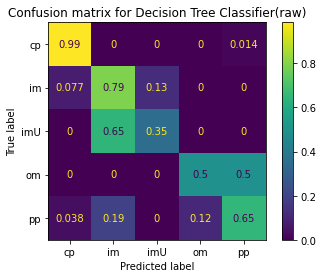

In [10]:
# decision tree classifier (raw)
from sklearn.tree import DecisionTreeClassifier

dtc_model.fit(x1_train, y1_train)    #fitting the model for gridsearch
print("\033[1m The best parameters are %s with a score of %0.2f \033[0m" %(dtc_model.best_params_, dtc_model.best_score_))   #displaying the best parameter values after tuning

dtc_raw_predictions = dtc_model.predict(x1_test)    #predictions on the test set

#evaluating the algorithm
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y1_test,dtc_raw_predictions)

#calculating the f1-score
print("\033[1m The f1-score of the Decision Tree Classifier(raw) is \033[0m", f1_score(y1_test, dtc_raw_predictions,average='micro'))


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_model, x1_test, y1_test, normalize='true')    #plotting the confusion matrix
plt.title("Confusion matrix for Decision Tree Classifier(raw)")
plt.show()

The best parameters for the model are Criterion: Entropy, max_depth=6 and max_features=auto, with a model score of 94% on the training set.   
From the above confusion matrix for the Decision Tree Classifier(raw), 99% of the **cp**, 79% of **im**, 35% of **imu**, 50%of **om** and 65% of **pp** classes are classified correctly.  
The **f1-score of the model is 0.792**, which is the harmonic mean of precision and recall. The higher the f1-score, the more accurate the model is.  
f1-score is a better metric when there are imbalanced classes in the dataset, which is the case of this particular dataset. 

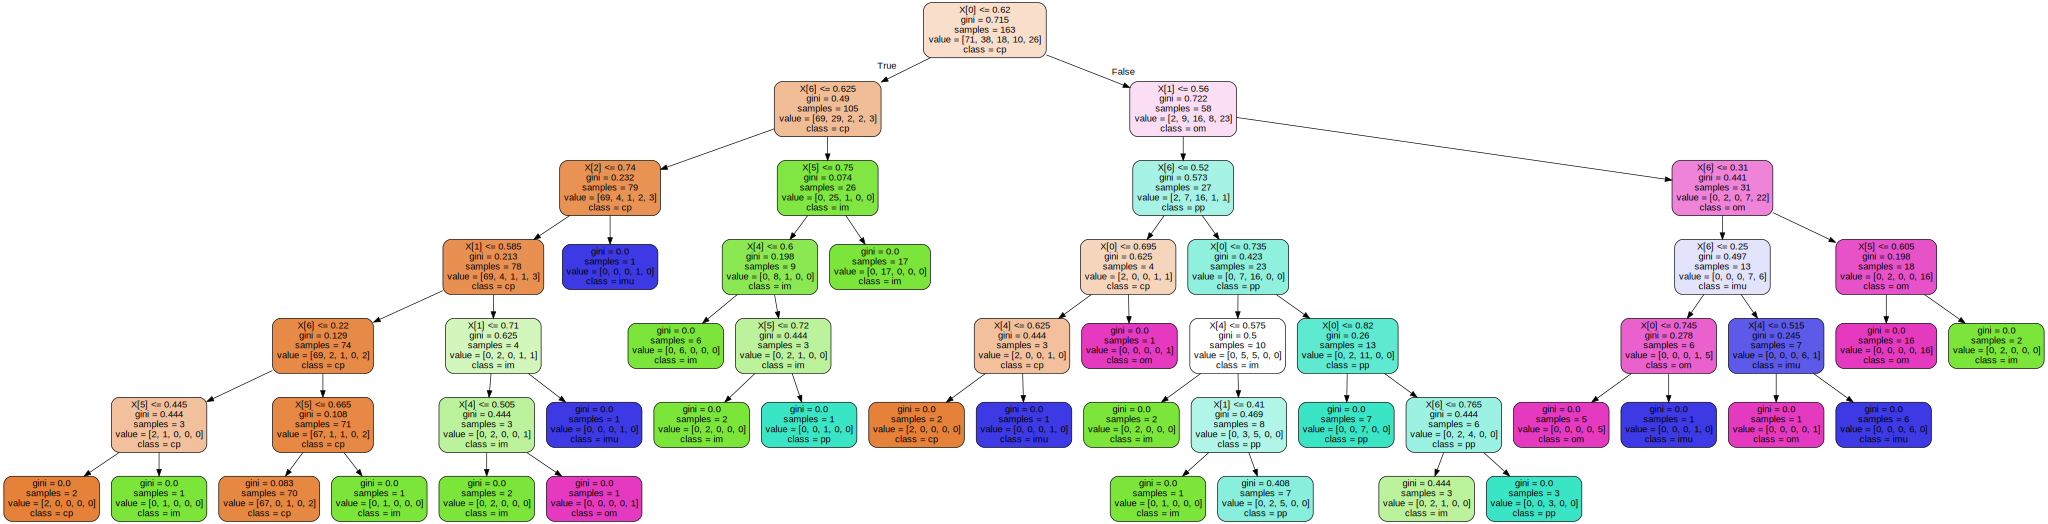

In [11]:
#visualizing decision trees
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtc_model.best_estimator_, out_file=None, filled=True, rounded=True,  
                                class_names=['cp','im','pp','imu','om'])
#draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("PROJECT1:raw_decision_tree_graphviz")   #saving the graph to the file named PROJECT1:raw_decision_tree_graphviz
graph

### TASK C: &emsp; DT Classifier (scaled)
###### c1. &emsp; Performing  feature scaling using standard scaler and using gridsearch to find the best hyperparameters
We now perform feature scaling on the training set using the StandardScaler transformer from Scikit-Learn.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()    
scaled_x_train = sc.fit_transform(x1_train)    #performing feature scaling 
scaled_x_test = sc.transform(x1_test)


###### c2. &emsp; Using GridSearchCV to find the best hyperparameters and Implementing Decision Tree Classifier(scaled) and displaying the confusion matrix
We are now implementing the best hyperparameters which we obtained with GridSearch in the above part on the scaled data, with the Decision Tree Classifier.

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto ..................
[CV]  criterion=gini, max_depth=2, max_features=auto, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt ..................
[CV]  criterion=gini, max_depth=2, max_features=sqrt, score=0.778, total=   0.0s
[CV] criterion=gini, max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.0s finished


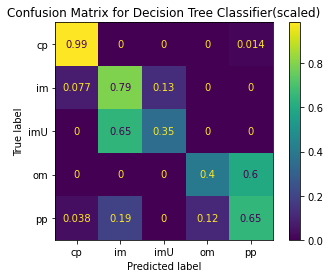

In [13]:
#decision tree classifier(scaled)
dtc_model.fit(scaled_x_train, y1_train)    #fitting the model for gridsearch
print("\033[1m The best parameters are %s with a score of %0.2f \033[0m" %(dtc_model.best_params_, dtc_model.best_score_))   #displaying the best parameter values after tuning

dtc_scaled_predictions = dtc_model.predict(scaled_x_test)    #predictions on the test set

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y1_test, dtc_scaled_predictions)    #confusion matrix for classification results

#calculating the f1-score
print("\033[1m The f1-score of the Decision Tree Classifier(scaled) is \033[0m", f1_score(y1_test, dtc_scaled_predictions,average='micro'))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_model, scaled_x_test, y1_test, normalize='true')    #plotting the confusion matrix
plt.title("Confusion Matrix for Decision Tree Classifier(scaled)")
plt.show()


As found out above,the best parameters for the model are Criterion: Entropy, max_depth=6 and max_features=auto, with a model score of 94% on the training set.  
From the above confusion matrix for the Decision Tree Classifier(scaled), 99% of the **cp**, 79% of **im**, 35% of **imu**, 40%of **om** and 65% of **pp** classes are classified correctly.  
The f1-score of the model is 0.786, which is the harmonic mean of precision and recall.   


### TASK D: &emsp; Outputs and comparison
When comparing the f1-scores of both the Decision Tree Classifier(raw) and Decision Tree Classifier(scaled), we can say that there is not much difference in the performance of our fine-tuned model with the raw and the scaled data, which is as assumed. One of the reasons might be due to considering the best hyperparameters to fine-tune the model. 

Now we will have a look at both the confusion matrices to find out what contributed to the less score in case of Decision Tree Classfier(scaled). For example, let us consider the class **om**. In case of the DT Classifier(raw), the number of **True Positives are 5, False Positives are 3 and False Negatives are 5** respectively where as in case of the DT Classifier(scaled), the number of **True Positives are 4, False Positives are 3 and False Negatives are 6** respectively. There is a difference in the number of instances classified as **TP and FN**. This means that in the scaled Decision Tree Classifier, 10% less **om** classes are classified correctly, which is why the f1-score is a little less when compared with the score obtained from the Decision Tree Classifier(raw).
